<div style='background :cyan; color:black; padding: 10px; border:2px solid black; text-align:center; border-radius :5px'>
    <h1>Les machines à vecteurs de support ( SVM ) : comment ça marche ?</h1>
</div>

**Objectif :  reconnaître les chiffres de 1 à 10 à partir des images fournies dans le dataset**  
Nous partirons à partir d'un dataset labelisé, c'est à dire que le modéle d'IA connaît déjà les réponses que l'on attend. 
Il s'agit ici d'un problème de classification.
Le modèle SVM fait partie des modèles utilisables pour atteindre notre objectif.   
C'est un modèle interessant lorsque les données ne sont pas trop nombreuses mais qui s'avère lent dans le cas contraire.

## Fonctionnement
Les SVM sont une généralisation des classifieurs linéaires (algorithmes de classement statistique)  dont le principe est de séparer les données en classe à l’aide d’une frontière, de telle façon que la distance entre les différents groupes de données et la frontière séparatrice soit maximale. Cette distance est appelée marge. Les données les plus proches de la frontière sont appelées vecteurs de support.  
Dans le schéma suivant, la frontière est la droite en rouge, les vecteurs de support sont les éléments les plus proches de la frontière entourés en vert. Finalement, la marge est la distance entre la droite en rouge et les deux droites en noire et en jaune.

<div style="display:flex; align-items:center; justify-content:center; height:200px">
    <img src="img/svm.png"/>
</div>

## Imports

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [6]:
#récupération d'un jeu de données
digits = load_digits()

## Exploration des données importés

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

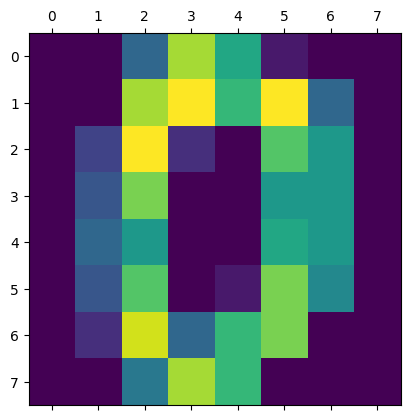

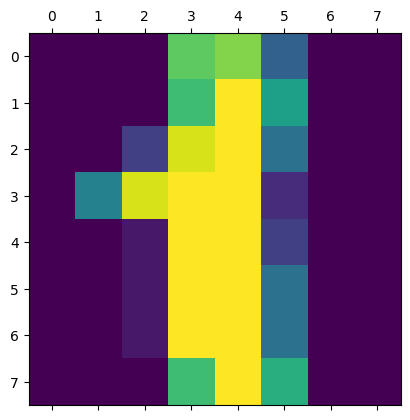

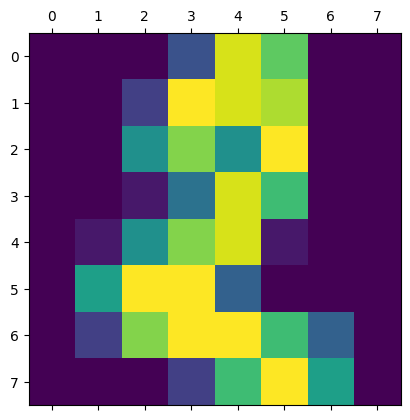

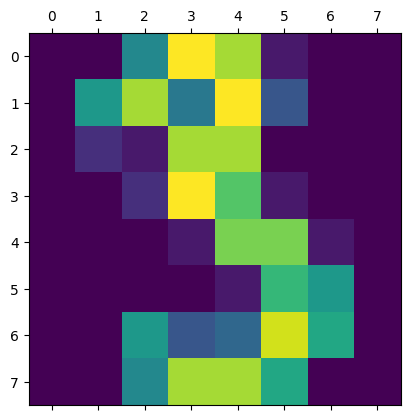

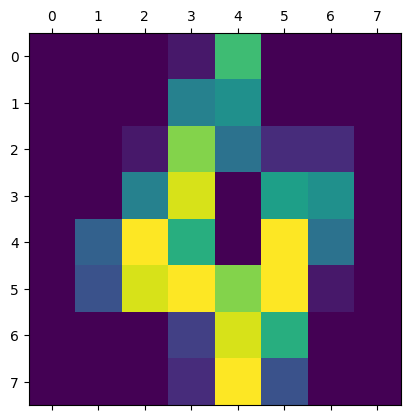

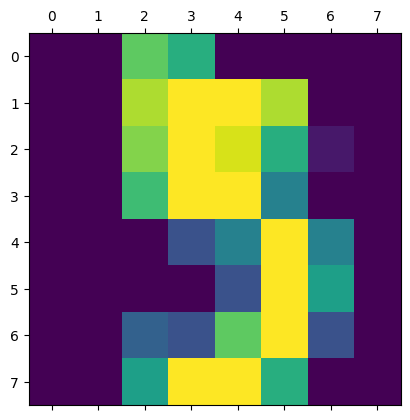

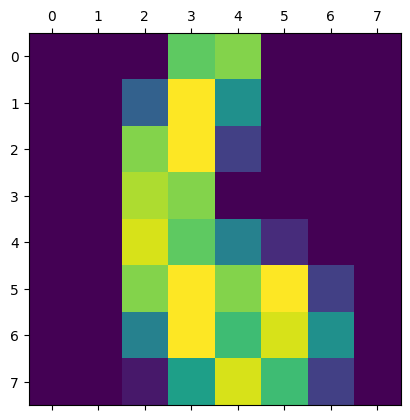

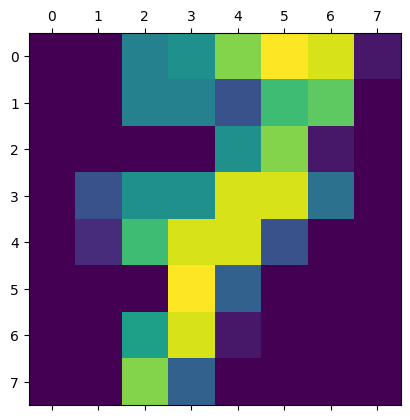

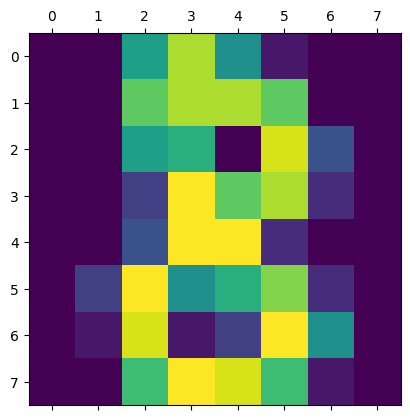

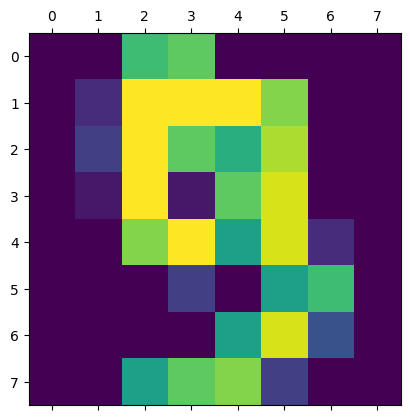

In [9]:
#afficher tous les nombres
for i in range(0,10):
    plt.matshow(digits.images[i]) 

In [10]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [11]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [12]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]



En explorant le jeu de données, nous avons pu identifier :   

La **target** : ( = le contenu de digits.target ) c'est à dire la caractéristique que l'on souhaite comprendre plus clairement. C'est la variable veut préduire en utilisant le reste de l'ensemble de données.   

Nos **features** :(= le contenu de digits.data ) c'est à dire les caractéristiques dont on suppose une influence sur la target. Ici toutes les caractéristiques nous intéressent puisqu'elles correspondent aux pixels qui permettent d'afficher les nombres ( voir les images au-dessus )
   
  
Nous assignons notre target et nos features aux variables X et y.

In [13]:
#features
X = digits.data
#target
y = digits.target

## Préparation des sets de training et de test

80% des échantillons sont affectés à l'ensemble de training ( ici X_train et y_train )
20% des échantillons sont affectés à l'ensemble de test : ( ici X_test et y_test )

La valeur assignée au paramètre test_size permet de choisir ce pourcentage. D'une manière générale on fournit au set de training la majorité des données disponibles.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Il y a {} données pour notre set de training.\nIl y a {} données pour notre set de test".format(len(X_train), len(X_test)))

Il y a 1437 données pour notre set de training.
Il y a 360 données pour notre set de test


## Entrainement du modèle et prédictions

In [15]:
#Entrainement avec le set de training
model = SVC()
model.fit(X_train, y_train)

#Prédictions avec le set de test
predictions = model.predict(X_test)
print("Comme prédictions, nous obtenons les résultats suivants : \n{}".format(predictions))


Comme prédictions, nous obtenons les résultats suivants : 
[6 0 5 8 9 7 7 8 5 6 6 8 2 6 0 9 1 8 2 8 6 4 9 2 2 2 1 7 9 8 1 9 5 4 3 0 2
 0 7 0 2 3 8 2 0 5 3 7 2 0 8 8 3 5 9 1 7 0 4 5 3 1 1 0 5 7 0 4 6 5 3 0 1 5
 7 2 0 1 6 9 7 5 1 9 6 6 3 5 0 8 6 8 3 4 0 7 5 5 1 2 2 4 5 5 1 1 2 8 8 3 0
 4 3 9 0 6 7 2 1 0 9 0 8 3 2 3 3 4 4 6 0 3 4 4 4 2 0 6 7 9 1 4 0 6 9 1 3 3
 2 1 2 7 1 2 2 3 3 3 8 7 1 1 3 0 4 9 8 1 6 5 2 3 0 3 2 0 7 2 3 1 7 7 6 6 8
 9 3 8 2 0 3 6 4 1 9 5 1 7 0 2 7 3 4 4 9 7 2 5 2 0 8 4 3 9 5 4 1 2 5 9 7 5
 5 7 5 3 1 4 7 3 3 3 0 2 6 3 4 4 5 9 7 1 1 7 2 8 3 7 8 6 7 8 9 2 5 6 3 0 9
 5 9 6 8 5 5 9 8 6 3 3 0 4 4 1 4 7 1 3 5 6 2 7 3 2 0 5 2 7 6 9 5 9 3 7 5 8
 1 2 1 4 3 9 6 7 8 2 9 7 1 8 7 5 9 1 6 8 6 3 5 8 9 6 0 8 6 8 4 6 2 6 7 6 5
 2 1 2 5 1 5 6 0 7 6 5 0 8 2 0 5 9 6 1 4 3 0 2 3 7 1 7]


## Etude de la précision de notre modèle

In [16]:
#Calculer la précision
sc = model.score(X_test, y_test)
print("En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))


En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
0.9861111111111112.


On peut aussi représenter graphiquement les résultats obtenus par notre modèle.


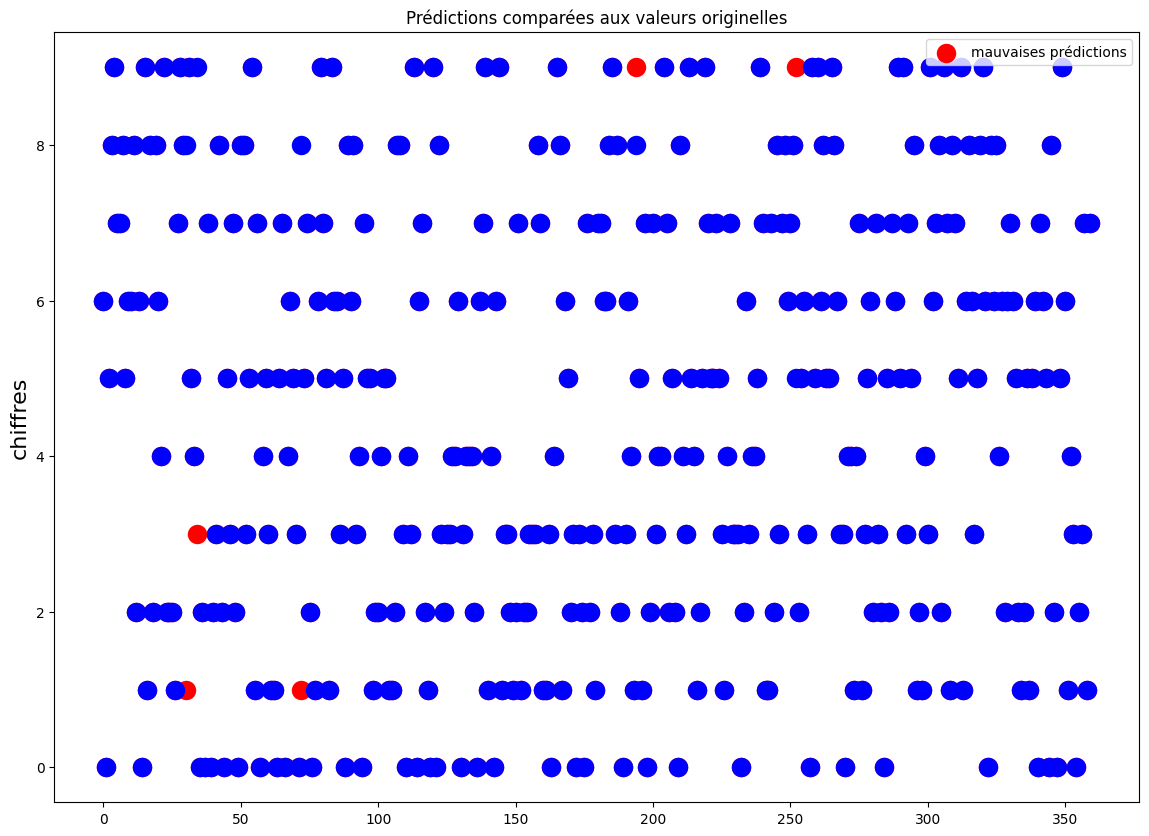

In [17]:
index = np.arange(len(y_test))

plt.figure(figsize=(14,10))
plt.scatter(index,predictions, label = 'mauvaises prédictions', c='red', lw=8)
plt.scatter(index,y_test, c='blue', lw=8)
plt.title('Prédictions comparées aux valeurs originelles')
plt.ylabel('chiffres', fontsize = 16)
plt.legend()
plt.show()

Plus proprement

Matrice de confusion:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  2  0  0  0  0  0  0 32  1]
 [ 0  0  0  1  0  0  0  0  0 28]]


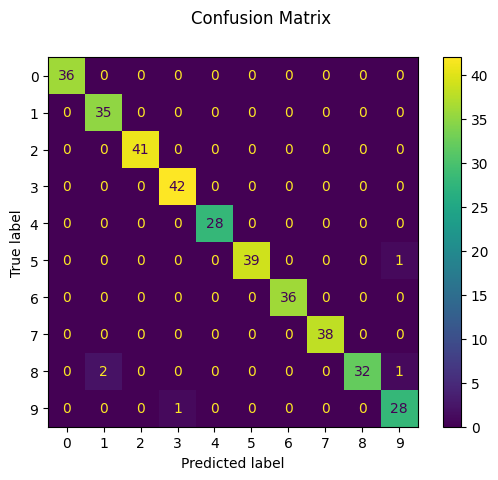

In [18]:
# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matrice de confusion:\n{disp.confusion_matrix}")

## Ajustements
Notre modèle semble performant avec les valeurs par défaut. 

Il existe cependant **trois paramètres** principaux sur lesquels on peut jouer afin d'améliorer notre modèle :

<h3>La valeur <strong>Gamma</strong> : </h3>

<img src='img/gamma.png' width=70%/>  
<br>
<p>En ajustant le gamma, on décide de considérer plus ou moins de points pour sélectionner nos catégories.</p>
<p><i>exemple : SVC(gamma = 0.001)</i> </p>
<br>
<h3>La  <strong>régularisation :</strong>  </h3>
<img src='img/regularization.png' width=70%/>
<br>
<p>En augmentant la valeur de régularition ( paramètre c = ... ) on augmente la précision avec laquelle on créé nos catégorie ( la courbe de délimitation apparaît plus sinueuse ), mais on augmente aussi le risque d'overfitting.</p>  
<p><i>exemple : SVC(C = 10)</i></p>
<br>
<h3>Le <strong>kernel</strong> ( noyau ) :</h3>
<div style="display:flex; flex-direction:row">
    <img style="padding: 15px" src='img/ker1.png' width=50%/>
    <img style="padding: 15px" src='img/kernel2.png' width=50%/>
</div>
<br>
<p>Le kernel permet de créer une nouvelle dimension où le modèle peut trouver une ligne de séparation. Choisir le bon noyau est crucial, car si la transformation est incorrecte, le modèle peut avoir de très mauvais résultats. Par défaut le kernel est réglé sur 'rbf'.</p>
<p><i>SVC(kernel='linear')</i></p>

Matrice de confusion:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  4  0  0  0  0  0  1 29  1]
 [ 0  0  0  0  0  0  0  0  1 28]]


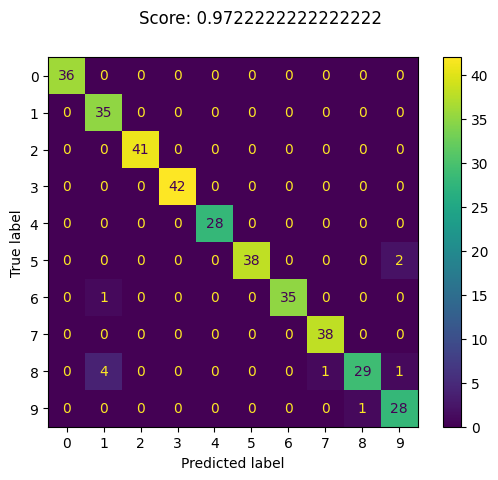

In [19]:
#entrainement et prediction en changeant les paramètres du modèle
model = SVC(kernel='linear', C=50, gamma = 0.005)
model.fit(X_train, y_train)
sc = model.score(X_test, y_test)
predictions = model.predict(X_test)


#visualisation
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Score: {}".format(sc))
print(f"Matrice de confusion:\n{disp.confusion_matrix}")

Pour le cas étudié, l'ajustement des paramètres n'a pas montré d'amélioration notable.